In [82]:
import numpy as np
from numpy import array
from PIL import Image
from matplotlib import pyplot as plt

In [139]:
#------------------ DILATACION -----------------------
#imagen es tipo imagen y kernel es una matriz 2x2
def dilatacion(imagen, ker, filas, columnas, dimensiones):
    convolucion_r = np.empty((filas,columnas))
    convolucion_g = np.empty((filas,columnas))
    convolucion_b = np.empty((filas,columnas))

    r, g, b = imagen.split() #separa la imagen en sus 3 colores rgb
    
    matriz_rojo = np.array(r)
    matriz_verde = np.array(g)
    matriz_azul = np.array(b)

    for x in range(filas):
        for y in range(columnas):
            for x2 in range(3):
                for y2 in range(3):
                    if(x>1 and x<filas-1 and y>1 and y<columnas-1):
                        convolucion_r[x,y] = convolucion_r[x,y] or (matriz_rojo[x,y] * ker[x2,y2] * ker[x2,y2])
                        convolucion_g[x,y] = convolucion_g[x,y] or (matriz_verde[x,y] * ker[x2,y2] * ker[x2,y2])
                        convolucion_b[x,y] = convolucion_b[x,y] or (matriz_azul[x,y] * ker[x2,y2] * ker[x2,y2])

    dil = union_imagen(convolucion_r,convolucion_g,convolucion_b,filas,columnas,dimensiones)
    
    plt.imshow(dil)

In [85]:
#------------------ EROSION -----------------------

In [110]:
# se lee la imagen y se obtienen sus canales RGB junto 
# con sus respectivas matrices
imagen = Image.open("cosa.jpg")
fondo = Image.open("fondo.jpg")
fondo_nuevo = Image.open("frutero.jpg")

ancho = 240
alto = 240

imagen = imagen.resize((ancho, alto))
fondo = fondo.resize((ancho, alto))
fondo_nuevo = fondo_nuevo.resize((ancho,alto))

matriz_img = np.array(imagen)
matriz_fnd = np.array(fondo)
matriz_nuevo = np.array(fondo_nuevo)

filas,columnas,dimensiones = matriz_img.shape # filas, columnas y dimensiones de la matriz

r, g, b = imagen.split() #separa la imagen en sus 3 colores rgb
r2, g2, b2 = fondo.split() #separa la imagen en sus 3 colores rgb

diferencia = fondo

#obtienen las matrices de cada color
m_rojo_img = np.array(r)
m_verde_img = np.array(g)
m_azul_img = np.array(b)

m_rojo_fnd = np.array(r2)
m_verde_fnd = np.array(g2)
m_azul_fnd = np.array(b2)
    
# se muestran las imagenes
#plt.imshow(imagen)
#plt.imshow(fondo)
#plt.imshow(fondo_nuevo)


In [111]:
kernel = np.ones((3,3))


#print(kernel)


C:\Users\chj06\AppData\Local\Temp\ipykernel_10524\2078155878.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  abs_g=abs(m_verde_fnd[y][x]-m_verde_img[y][x])
C:\Users\chj06\AppData\Local\Temp\ipykernel_10524\2078155878.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  abs_b=abs(m_azul_fnd[y][x]-m_azul_img[y][x])
C:\Users\chj06\AppData\Local\Temp\ipykernel_10524\2078155878.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  abs_r=abs(m_rojo_fnd[y][x]-m_rojo_img[y][x])


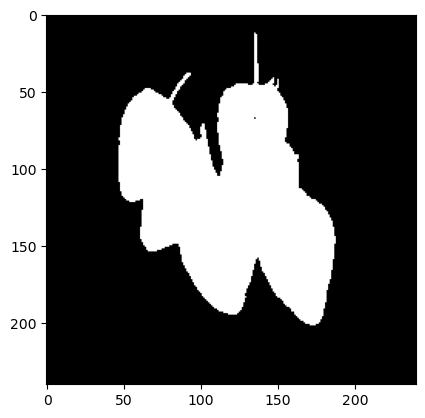

In [112]:
# ----------------------- VALOR ABSOLUTO --------------------
#Se saca el absoluto
for x in range (filas):
    for y in range (columnas):
        abs_r=abs(m_rojo_fnd[y][x]-m_rojo_img[y][x])
        abs_g=abs(m_verde_fnd[y][x]-m_verde_img[y][x])
        abs_b=abs(m_azul_fnd[y][x]-m_azul_img[y][x])
        #Se le pasan a la imagen
        diferencia.putpixel((x,y),(abs_r, abs_g, abs_b))


#diferencia = union_imagen(d_rojo,d_verde,d_azul,filas,columnas,dimensiones)
#matriz_dif = np.array(diferencia)

# ------------------ CONVERISON A GRISES -------------------------
gris = diferencia.convert("L")
matriz_gris = np.array(gris)

# --------------------------- UMBRALIZACION --------------------------
for x in range(ancho):
    for y in range(alto):
        if ar_t_g[y][x]<180:
            diferencia.putpixel((x,y),(255,255,255))
        else:
            diferencia.putpixel((x,y),(0,0,0))
        

plt.imshow(diferencia)

# ------------------ NEGACION -----------------------
matriz_negada = ~np.array(diferencia)
negada = Image.fromarray(notU)



In [113]:
# ----------------- UNION CANALES RGB ------------------
# une los canales rgb de las imagenes
# r,g,b son matrices 2x2
# filas,columnas,dimensiones son datos de tipo int
def union_imagen(r,g,b,filas,columnas,dimensiones):
    union = np.zeros((filas,columnas,dimensiones), dtype=np.uint8) # matriz que contiene la nueva imagen 
        
    # Asigna valores a cada canal de color
    union[:,:,0] = r  # valores de rojo
    union[:,:,1] = g  # valores de verde
    union[:,:,2] = b  # valores de azul

    # Crea una imagen RGB desde la matriz tridimensional
    imagen = Image.fromarray(union)

    # Guarda la imagen en un archivo
    #imagen.save("imagen.jpg")
    #print("Imagen lista")
    #plt.imshow(imagen)
    
    return imagen

In [122]:
# --------------------------- COMBINACION IMAGENES ----------------------
r=(matriz_nuevo & notU)|(matriz_img & matriz_dif)
final=Image.fromarray(r)
final.show()

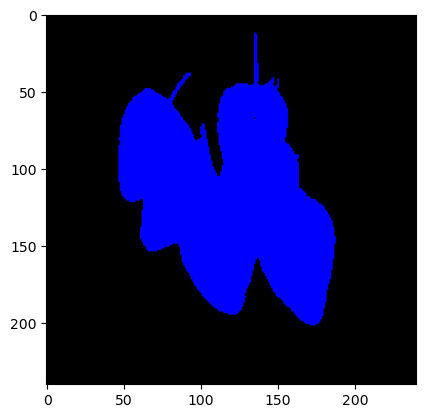

In [140]:
dilatacion(diferencia,kernel,filas,columnas,dimensiones)